In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
positive = pd.read_csv('positive_words.txt')
negative = pd.read_csv('negative_words.txt')

In [14]:
game_dic = {"alden ring":[], 'other game': [], 'game hour': []}
game_data = pd.DataFrame(data=game_dic)
user_response = []

In [15]:
pos_list = positive['positive_words'].tolist()
neg_list = negative['negative_words'].tolist()

In [16]:
def isFloat(s):
   try:
      float(s)
      return True
   except:
      return False

In [17]:
quit = ["q", 'bye', 'stop', 'quit']
game_pref = {}
neg_count = 0
pos_count = 0
neu_count = 0

user_count = 0

while user_count < 3:
    user_count += 1

    user = input("Hi, how's it going?")

    while user.lower() not in quit:
        user = input("It's nice to meet you! How do you think about Alden Ring?")
        sentiment = user.split()
        for i in sentiment:
            if i.lower() in neg_list:
                neg_count += 1
            elif i.lower() in pos_list:
                pos_count += 1
            else:
                neu_count += 1
        if user.lower() not in quit:
            if neg_count < pos_count and neg_count < 3 and (neu_count/len(sentiment)) < 0.8:
                game_pref['alden_ring'] = 'love'
                user = input('Sounds good! Do you play other games?')
                game_pref['other_game'] = user.lower()
            elif neg_count > pos_count and (neu_count/len(sentiment)) < 0.8:
                game_pref['alden_ring'] = 'hate'
                user = input('Ok then...What is your favorite game?')
                game_pref['other_game'] = user.lower()
            else: 
                game_pref['alden_ring'] = 'neutral'
                user = input('Alright. Do you have other game recommendation?')
                game_pref['other_game'] = user.lower()
            if user.lower() not in quit:
                user = input('That is interesting. How much time do you spend on playing game every week?')
                if user.lower() not in quit:
                    game_pref['time'] = user.lower()
                    if isFloat(user) is True:
                        user = input('Is the time in hour, minute, or seconds?')
                        if user.lower() not in quit:
                            game_pref['time'] += " " + user.lower()
        user_response.append(game_pref)
        game_pref = {}
        neg_count = 0
        pos_count = 0
        neu_count = 0
        user = "quit"
        print('Thank you! Goodbye')

Hi, how's it going?good
It's nice to meet you! How do you think about Alden Ring?love it
Sounds good! Do you play other games?stardew valley
That is interesting. How much time do you spend on playing game every week?10 hour
Thank you! Goodbye
Hi, how's it going?it is a bad day
It's nice to meet you! How do you think about Alden Ring?I don't like this game
Alright. Do you have other game recommendation?gta 5
That is interesting. How much time do you spend on playing game every week?5 hour
Thank you! Goodbye
Hi, how's it going?good
It's nice to meet you! How do you think about Alden Ring?hate it
Ok then...What is your favorite game?Stardew Valley
That is interesting. How much time do you spend on playing game every week?3 hour
Thank you! Goodbye


In [18]:
user_input = pd.DataFrame(user_response)

In [19]:
user_input

,alden_ring,other_game,time
0,love,stardew valley,10 hour
1,neutral,gta 5,5 hour
2,hate,stardew valley,3 hour


<AxesSubplot:ylabel='How do you think about alden ring?'>

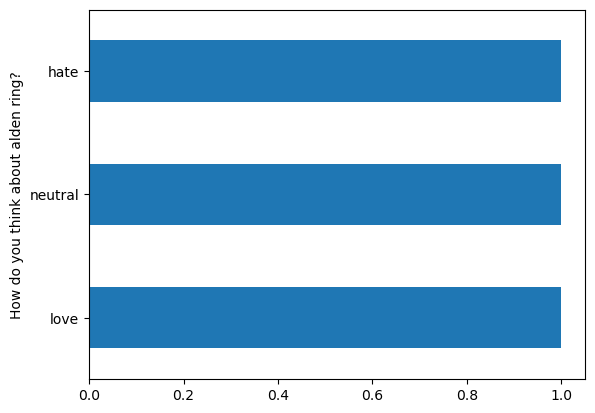

In [20]:
user_input['alden_ring'].value_counts().plot(kind='barh', xlabel="How do you think about alden ring?")

<AxesSubplot:ylabel='What other games do you play'>

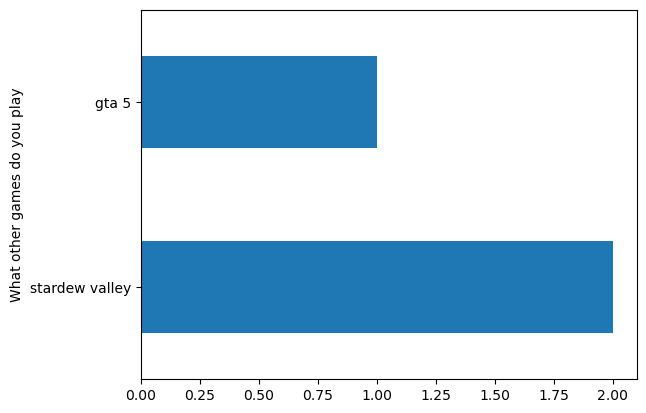

In [21]:
user_input['other_game'].value_counts().plot(kind='barh', xlabel='What other games do you play')

<AxesSubplot:ylabel='How much time you spend on play games?'>

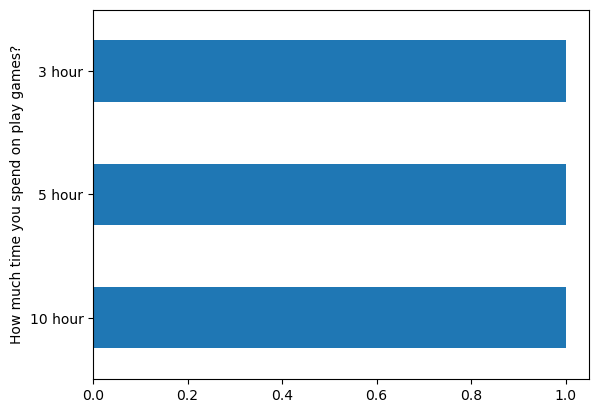

In [22]:
user_input['time'].value_counts().plot(kind='barh', xlabel='How much time you spend on play games?')